## Cluster 分群
#### 非監督式學習，可想像成讓電腦去判斷標籤的過程
## Kmeans (分群)
#### k個圓心，k群
- <font color=blue size=3>狀況1: 已知數據有n類 ->直接將k設為n</font>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

iris
df = pd.DataFrame(iris["data"], 
                  columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
#做公式(fit)
#在你已知幾種的時候,k就直接選
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)

# 資料100%丟進去訓練
cluster.fit(iris["data"])

# 迭代不一定能達到正確答案 ex.一開始挑選的k點太誇張(ex太近)
# k-means++意義: 一開始圓心挑選的遠一些

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
df["ans"] = cluster.predict(iris["data"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
cluster.cluster_centers_
# 印出每群的圓心 -> 為一虛擬的點
# 圓心意義: 一個標準的target，最典型的樣貌描述 (data)

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
cluster.labels_
# 因為沒有設先給標籤，因此預測的1，並不一定等同於正確標籤的1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Silhouette Score
#### 為一種衡量標準，衡量集中程度 -> 包含: 1. 親近程度 2. 疏遠程度
- <font color=blue size=3>狀況2: 不知k -> 一個一個數嘗試，並用Silhouette Score進行測試，檢查某點是否在最佳群</font>


In [9]:
from sklearn.metrics import silhouette_score

# 嘗試要分成幾群 -> 從2試到5
# 依據最後所得到的Silhouette Score，判斷分成幾群為最佳
for k in range(2, 6):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    print("分成", k, "群的分數: ", s)

分成 2 群的分數:  0.681046169211746
分成 3 群的分數:  0.5528190123564091
分成 4 群的分數:  0.4980505049972867
分成 5 群的分數:  0.4887488870931048


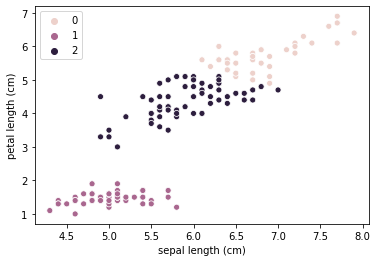

In [10]:
# 因是平面圖(二維) -> 選2個特徵畫圖

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %表不是python程式，而是jupyter notebook的特殊指令

cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])
sns.scatterplot(x=df["sepal length (cm)"],
                y=df["petal length (cm)"],
                hue=cluster.labels_)
# seaborn.scatterplot里的參數hue: 多一個特徵，以顏色或其他形式表現在圖上
# 3有群中有2群距離太近，驗證了前面以Silhouette Score判斷的"分成2群為佳"